# Bài toán 2: Xây dựng mô hình dựa vào giải thuật SVM trên dữ liệu hình ảnh Handwritten-Digit-MNIST-SVM.

## Nhiệm vụ 1: Tìm hiểu về cách biểu diễn và hiển thị các ảnh từ tập dữ liệu là hình ảnh

### 1. Tải dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

### 2. Khảo sát thông tin dữ liệu

#### 2.1. Xem toàn bộ dữ liệu

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

#### 2.2. Xem một ảnh 8×8 dạng ma trận

In [3]:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

#### 2.3. Dạng vector 64 chiều

In [4]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

#### 2.4. Xem 9 nhãn đầu tiên

In [5]:
digits['target'][0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

### 3. Vẽ 64 hình đầu tiên từ dữ liệu

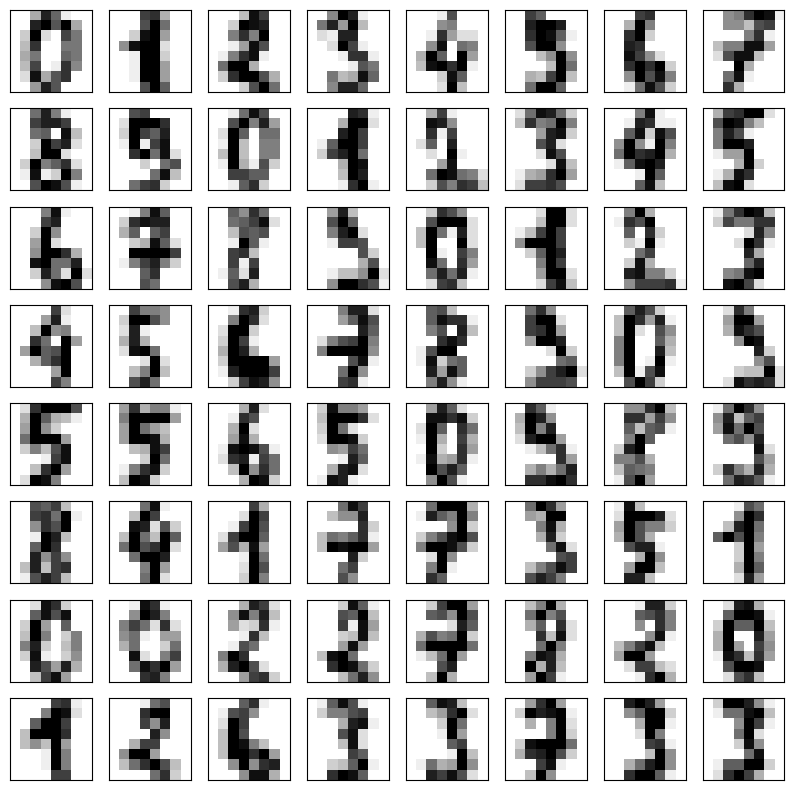

In [6]:
fig, ax = plt.subplots(8, 8, figsize=(10, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

### 4. Hàm vẽ 1 ảnh bất kỳ

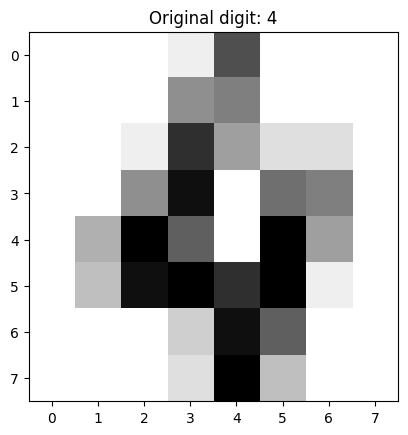

In [7]:
def view_digit(index):
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r)
    plt.title("Original digit: " + str(digits.target[index]))
    plt.show()

# Ví dụ vẽ ảnh thứ 4
view_digit(4)

## Nhiệm vụ 2: Xây dựng mô hình SVM để nhận diện chữ viết tay từ 0 – 9

### 1. Chuẩn bị dữ liệu & xây dựng mô hình SVM

In [8]:
from sklearn import svm

main_data = digits['data']      # 1797 ảnh, mỗi ảnh 8x8 = 64 pixel
targets = digits['target']

svc = svm.SVC(gamma=0.001, C=100)

# GAMMA: độ uốn cong của siêu phẳng
# - gamma lớn → mô hình ôm sát dữ liệu → dễ overfit

# C: penalty của lỗi
# - C lớn → cố gắng phân loại đúng tất cả điểm → dễ overfit
# - C nhỏ → mô hình đơn giản hơn → tốt cho generalization

svc.fit(main_data[:1500], targets[:1500])

predictions = svc.predict(main_data[1501:])

### 2. Confusion Matrix

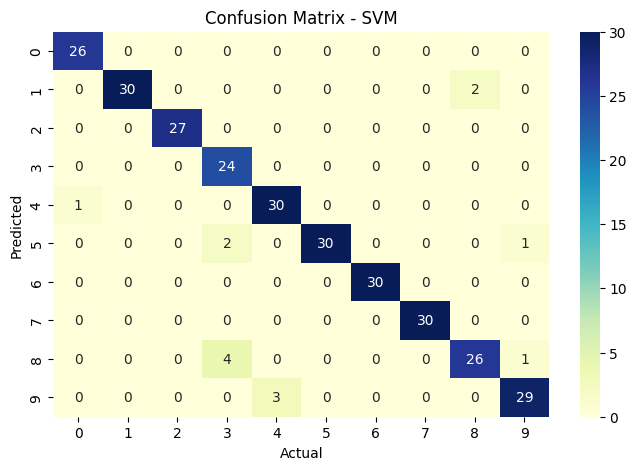

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predictions, targets[1501:])
conf_matrix = pd.DataFrame(cm)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### 3. Classification Report (Precision – Recall – F1)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(predictions, targets[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296



#### Nhận xét hiệu quả mô hình

- Bộ dữ liệu Digits có kích thước nhỏ (8×8), dễ phân lớp → SVM hoạt động rất tốt.

- Confusion matrix cho thấy phần lớn chữ số được phân loại đúng, chỉ nhầm ở một số chữ số có nét tương tự nhau (3–5, 4–9,…).

- Classification report:

    + Precision – Recall – F1 đều cao (>0.95) ở hầu hết các lớp.

    + Lớp bị nhầm nhiều nhất tùy vào dữ liệu nhưng thường là số 8 hoặc 9.

- Tham số:

    + gamma=0.001 và C=100 giúp mô hình học sâu hơn nhưng có thể overfit → Tuy nhiên do dataset nhỏ nên vẫn hoạt động ổn.